**Outlier Detection** is important task in Exploratory Data Analysis.
It is conducted for identification of data points that deviate significally from majority data points and can disrupt algorithm learning process.

Presence of outliers reveals either <u>insufficient level of data collection pipelines</u> (due to execution errors, manual data input, especially for tabular data) or <u>malicious data flow</u> generated by froudsters, network hackers, etc.

Thus, it is useful to check for outliers before we even start to build the main model for our business task.

### Generate data

In [ ]:
!pip install -q drawdata

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 234.8/234.8 kB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 213.7/213.7 kB 17.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 717.6/717.6 kB 25.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 57.0 MB/s eta 0:00:00


In [ ]:
from drawdata import ScatterWidget

widget = ScatterWidget()
widget

ScatterWidget()

In [ ]:
data = widget.data_as_pandas
data.head()

,x,y,color,label
0,139.841440,373.882961,#1f77b4,a
1,118.414013,351.477182,#1f77b4,a
2,135.929940,356.920469,#1f77b4,a
3,116.669988,344.712030,#1f77b4,a
4,96.725262,325.300546,#1f77b4,a


In [ ]:
#normalise data
data.loc[:, 'x'] = data['x'] / data['x'].max()
data.loc[:, 'y'] = data['y'] / data['y'].max()
dots = data[['x', 'y']].to_numpy()

### Wrapper class for sklearn models

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


def detect_outliers(data, clfs, clf_names):
    fig, axes = plt.subplots(1, len(clfs), figsize=(20, 6))
    if len(clfs) == 1:
        axes = [axes]

    for ax, clf, name in zip(axes, clfs, clf_names):
        predictions = clf.fit_predict(data)
        scatter = ax.scatter(data[:, 0], data[:, 1], c=predictions, cmap='Blues', edgecolors='k')
        ax.set_title(f"{name}")
        ax.set_xlabel("Feature 1")
        ax.set_ylabel("Feature 2")
        fig.colorbar(scatter, ax=ax)

    plt.suptitle('Anomaly Detection algorithms')
    plt.tight_layout()
    plt.show()


### Isolation Forest

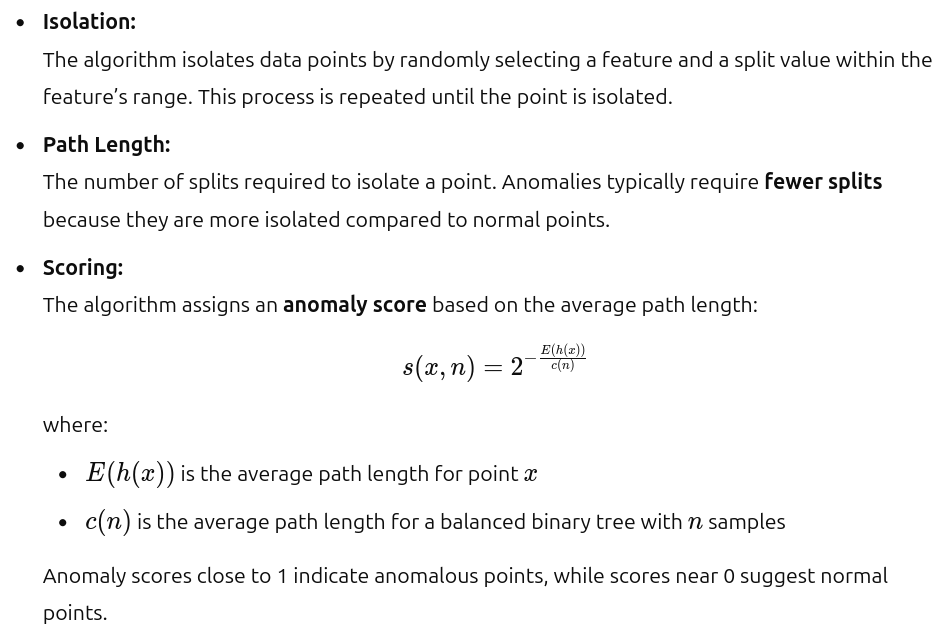

In [ ]:
from sklearn.ensemble import IsolationForest


IF_clf = IsolationForest(n_estimators=100, contamination='auto', random_state=42)

### OneClassSVM

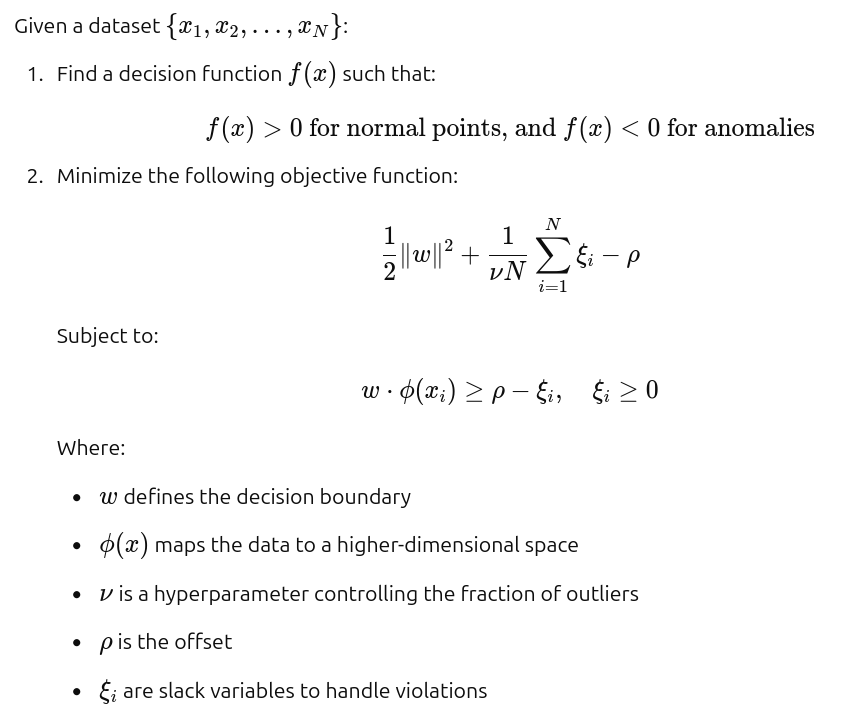

In [ ]:
from sklearn.svm import OneClassSVM

OneClassSVM_clf = OneClassSVM(degree=3, kernel='rbf')

### LocalOutlierFactor (LOF)

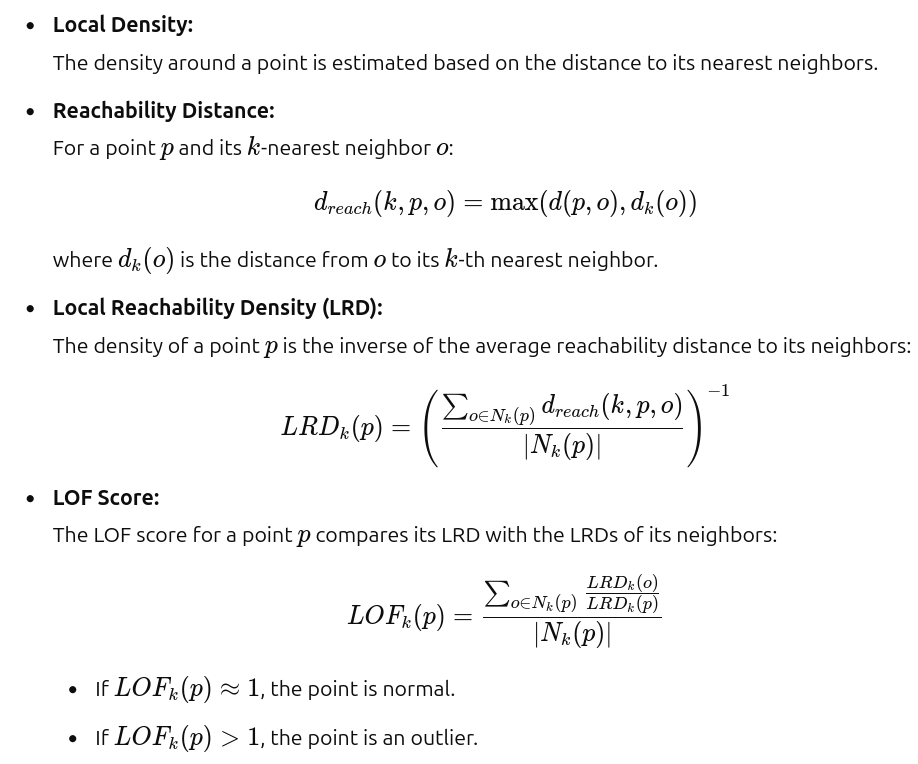

In [ ]:
from sklearn.neighbors import LocalOutlierFactor

LOF_clf = LocalOutlierFactor(n_neighbors=5)

### DBSCAN

Consider a set of points in some space to be clustered. Let ε be a parameter specifying the radius of a neighborhood with respect to some point. For the purpose of DBSCAN clustering, the points are classified as core points, (directly-) reachable points and outliers, as follows:

A point p is a **core point** if at least **minPts** points are within distance **ε** of it (including p).

A point q is **directly reachable** from p if point q is within distance ε from core point p. Points are only said to be directly reachable from core points.

A point q is **reachable** from p if there is a path p1, ..., pn with p1 = p and pn = q, where each pi+1 is directly reachable from pi. Note that this implies that the initial point and all points on the path must be core points, with the possible exception of q.

All points not reachable from any other point are **outliers** or noise points.

Now if p is a core point, then it forms a cluster together with all points (core or non-core) that are reachable from it. Each cluster contains at least one core point; non-core points can be part of a cluster, but they form its "edge", since they cannot be used to reach more points.

In [ ]:
from sklearn.cluster import DBSCAN

dbscan_clf = DBSCAN(eps=0.1, min_samples=10)

### Comparison

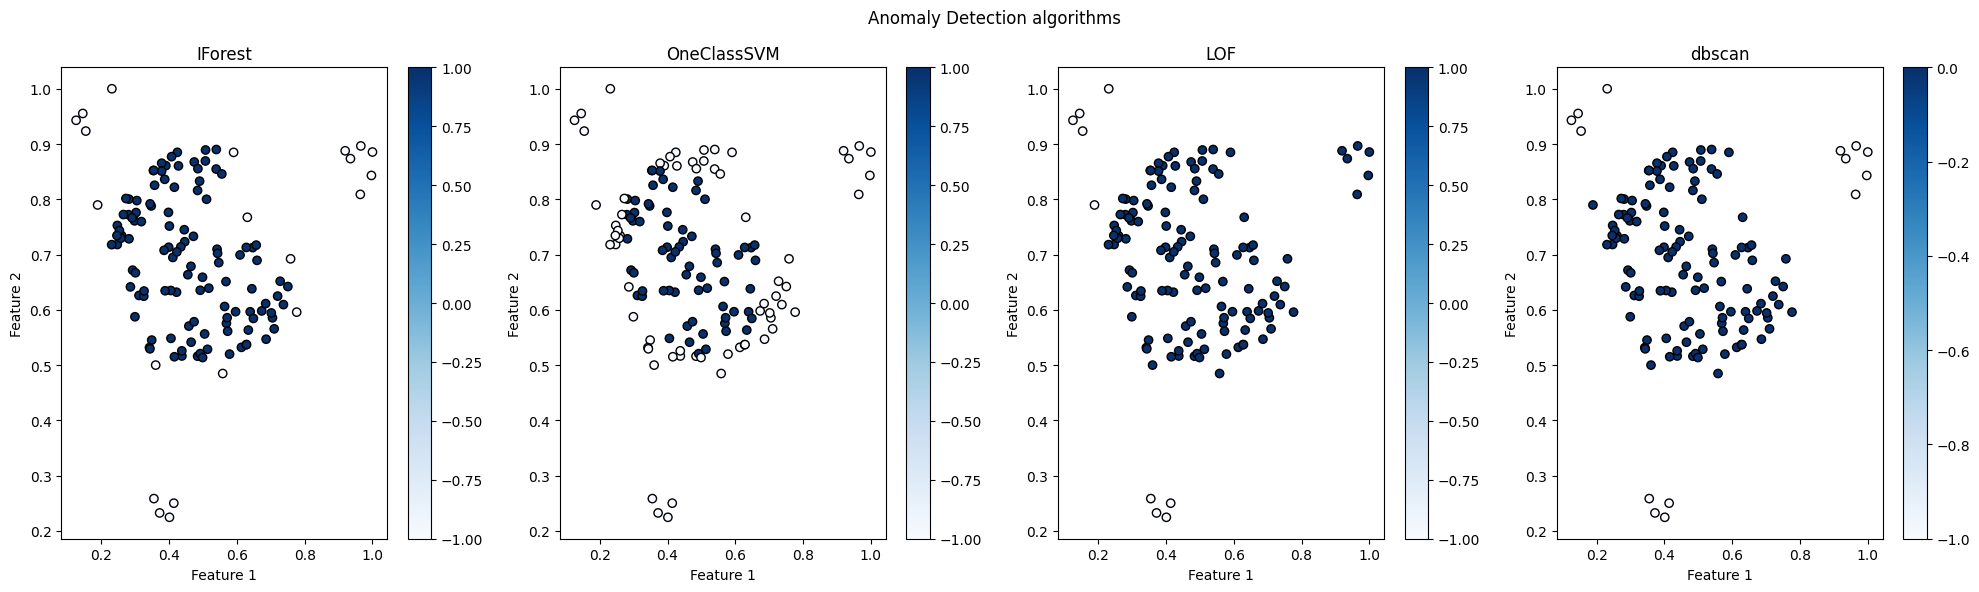

In [ ]:
clfs = [IF_clf, OneClassSVM_clf, LOF_clf, dbscan_clf]
names = ['IForest', 'OneClassSVM', 'LOF', 'dbscan']

detect_outliers(dots, clfs, names)